# Problem set 2: Finding the Walras equilibrium in a multi-agent economy

In [2]:
%load_ext autoreload
%autoreload 2

# Tasks

## Drawing random numbers

**Question:** 
<br>
Replace the missing lines in the code below to get the same output as in the answer.

**Output:**

In [3]:
print(' (0,0): x = 0.569 \n\
 (0,1): x = 0.077 \n\
 (1,0): x = 0.569 \n\
 (1,1): x = 0.077 \n\
 (2,0): x = 0.569 \n\
 (2,1): x = 0.077 ')

 (0,0): x = 0.569 
 (0,1): x = 0.077 
 (1,0): x = 0.569 
 (1,1): x = 0.077 
 (2,0): x = 0.569 
 (2,1): x = 0.077 


**Answer:**

In [4]:
# Import the NumPy library for numerical operations
import numpy as np

# Initialize the random number generator with a specific seed for reproducibility
np.random.seed(1986)

# Save the current state of the random number generator to reset it later
state = np.random.get_state()

# Loop through three iterations (i ranges from 0 to 2)
for i in range(3):

    # Restore the random number generator state at the beginning of each 'i' iteration
    np.random.set_state(state)

    # Nested loop for two iterations (j ranges from 0 to 1)
    for j in range(2):

        # Generate and print a random number from a uniform distribution between 0 and 1
        x = np.random.uniform()
        
        print(f'{i, j}: x = {x:.3f}')


(0, 0): x = 0.569
(0, 1): x = 0.077
(1, 0): x = 0.569
(1, 1): x = 0.077
(2, 0): x = 0.569
(2, 1): x = 0.077


## Find the expectated value

**Question:**

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i)
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

**Answer:**

In [5]:
# Import the numpy library for numerical operations
import numpy as np

# Set parameters
sigma = 3.14
omega = 2
N = 10000

# Set seed for reproducibility
np.random.seed(1986)

# Create an np.array of values for a random variable which follows a normal distribution
x = np.random.normal(loc = 0, scale = sigma, size = N)

# Create a function to limit the values in the np.array `x` to be within the range `[-omega, omega]`
def g(x, w):

    # Create a copy of the array of x values
    y = x.copy()

    # If any element in `y` is less than `-omega`, change that element to `-omega`
    y[x < -omega] = -omega
    
    # If any element in `y` is more than `omega`, change that element to `omega`
    y[x > omega] = omega

    # Return the modified array
    return y

# Calculate and print the mean and variance of the modified values
mean = np.mean(g(x = x, w = omega))
var = np.var(g(x = x, w = omega))

print(f'The mean of g(x, w) is {mean:.5f} and the variance is {var:.5f}')


The mean of g(x, w) is -0.00264 and the variance is 2.69804


## Interactive histogram

**First task:** Consider the code below. Fill in the missing lines so the figure is plotted.

**Answer:**

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets

from scipy.stats import norm

# Define a function for plotting and fitting a normal distribution to a dataset
def fitting_normal(X, mu_guess, sigma_guess):
    # Create a variable which follows the normal distribution
    F = norm(loc = mu_guess, scale = sigma_guess)

    # Find lower and upper values of x given the cumulative density function (CDF)
    x_low = F.ppf(0.001)
    x_high = F.ppf(0.999)

    # Create an np.array of equi-distant x-values for the normal distribution
    x = np.linspace(x_low, x_high, 100)

    # Create figure
    fig = plt.figure()

    # Add subplot with 1 row, 1 column and 1 index
    ax = fig.add_subplot(1, 1, 1)

    # Add values of x and y to the plot
    ax.plot(x, F.pdf(x))

    # Create a histogram given X 
    ax.hist(X, bins=100, density = True, histtype = 'stepfilled')

    # Set limits for x and y
    ax.set_xlim([-6, 6])
    ax.set_ylim([0, 0.5]);

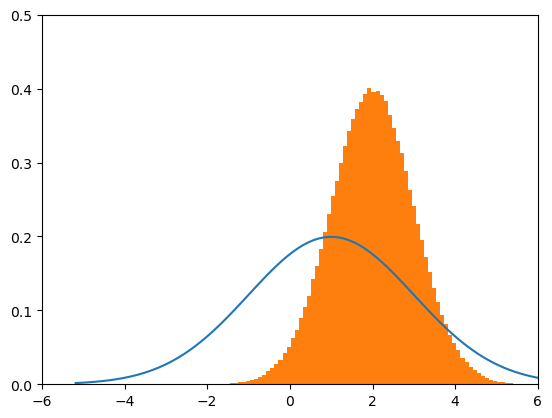

In [7]:
# Set parameters
mu_true = 2
sigma_true = 1

mu_guess = 1
sigma_guess = 2

# Create a np.array of X values for the histogram
X = np.random.normal(loc = mu_true, scale = sigma_true, size = 10**6)

# Call function
fitting_normal(X, mu_guess, sigma_guess)

**Second task:** Create an interactive version of the figure with sliders for $\mu$ and $\sigma$.

**Answer:**

In [8]:
# Create an interactive slider
widgets.interact(fitting_normal, 
                 X = widgets.fixed(X),
                 mu_guess=widgets.FloatSlider(
                     description = "$\mu$", min = 0.1, max = 5, step= 0.05, value = 1),
                 sigma_guess = widgets.FloatSlider(
                     description = "$\sigma$", min = 0.1, max = 5, step = 0.05, value=1));

interactive(children=(FloatSlider(value=1.0, description='$\\mu$', max=5.0, min=0.1, step=0.05), FloatSlider(v…

## Modules

**Question:**

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

**Answer:**

In [9]:
# Import the function myfun from mymodule
from mymodule import myfun

# Call myfun with a given value
myfun(5)

25

## Git

1. Try to go to your own personal GitHub main page and create a new repository. Then put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.



# Problem

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

**Answer:**

In [13]:
# Import the numpy library for numerical operations and scipy for optimization
import numpy as np
from scipy import optimize

## Define parameters for the market simulation
# Set number of agents in the simulation
N = 10000 

# Mean of the normal distribution for preferences
mu = 0.5 

# Standard deviation of preferences
sigma = 0.2  

# Minimum preference threshold
mu_low = 0.1  

# Maximum preference threshold
mu_high = 0.9

# Parameter for the exponential distribution of endowments for good 1
beta_1 = 1.3

# Parameter for the exponential distribution of endowments for good 2
beta_2 = 2.1  

# Random seed for reproducibility
seed = 1986  

# Ensure reproducibility by initializing the random number generator
np.random.seed(seed)

# Generate individual-specific preferences from a normal distribution and ensure they fall inside the bounds
alpha_tilde_j = np.random.normal(loc=mu, scale=sigma, size=N)
alpha_j = np.fmax(mu_low, np.fmin(mu_high, alpha_tilde_j))

# Generate individual endowments for each good from an exponential distribution
e_j_1 = np.random.exponential(scale=beta_1, size=N)
e_j_2 = np.random.exponential(scale=beta_2, size=N)

# Define the demand function for good 1, accounting for preferences, prices, and endowments
def demand_good_1(alpha_j, p_1, p_2, e_j_1, e_j_2):
    # Income based on endowments and prices
    I = p_1 * e_j_1 + p_2 * e_j_2

    # Demand for good 1 as a function of income, price, and preferences
    x_1 = alpha_j * I / p_1

    # Aggregate demand
    return np.sum(x_1)  

# Compute the excess demand for good 1 by comparing total demand to total supply
def excess_demand_good_1(alpha_j, p_1, p_2, e_j_1, e_j_2):

    # Total demand for good 1
    demand_x_1 = demand_good_1(alpha_j, p_1, p_2, e_j_1, e_j_2)

    # Total supply of good 1
    supply_x_1 = np.sum(e_j_1)

    # Excess demand is the difference between demand and supply
    return demand_x_1 - supply_x_1  

from scipy import optimize

def find_equilibrium(alpha_j, p_1_initial, p_2, e_j_1, e_j_2):
    # Objective function: calculates excess demand given a price p_1
    def obj(p_1):
        return excess_demand_good_1(alpha_j, p_1, p_2, e_j_1, e_j_2)

    # Use root finding to solve for equilibrium price
    res = optimize.root(obj, p_1_initial)
    
    # Assert if 
    assert res.success

    return res.x[0]

# Call function
equilibrium = find_equilibrium(alpha_j, 1.0, 1.0, e_j_1, e_j_2)

# Print result
print(f'{equilibrium:.5f}')


1.62056


## Save and load

**Question:**

Consider the code below and fill in the missing lines so the code can run without any errors.

**Answer:**

In [11]:
# Import required modules for data manipulation and storage
import numpy as np
import pickle

# a. Creating a dictionary with mixed data types: strings, NumPy array, and tuple
my_data = {}
my_data['A'] = {'a' : 1, 'b' : 2}
my_data['B'] = np.array([1, 2, 3])
my_data['C'] = (1, 4, 2)

# Create a dictionary specifically for storing NumPy arrays
my_np_data = {}
my_np_data['D'] = np.array([1, 2, 3])
my_np_data['E'] = np.zeros((5, 8))
my_np_data['F'] = np.ones((7, 3, 8))

# Save the my_data dictionary using pickle for object serialization
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)
    
# Save the my_np_data dictionary as a .npz file, a compressed NumPy file format
np.savez(f'data.npz', **my_np_data)
    
# Function to load data from both pickle and .npz files and print a success message
def load_all():
    # Load and unpack the pickle file
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    # Load and unpack the .npz file
    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        
    
    print('variables loaded without error')
    
# Attempt to run the load_all function and catch any exceptions
try:
    load_all()
except:
    print('failed')


variables loaded without error
